In [1]:
import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150), p_sapling=0.0025, p_lightning=5.0e-6):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    def _rand_bool(self, p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

In [3]:
forest = Forest()
print(forest.tree_fraction)

forest.grow_trees()
print(forest.tree_fraction)

0.0
0.0023555555555555556


In [4]:
import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150), p_sapling=0.0025, p_lightning=5.0e-6):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    def _rand_bool(self, p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True
        
    def start_fires(self):
        """
        Start of fire.
        """
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.fires[lightning_strikes] = True
    
    def burn_trees(self):
        """
        Burn trees.
        """
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.fires] = False
        self.fires = new_fires
        
    def advance_one_step(self):
        """
        Advance one step
        """
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

In [5]:
#test#


forest = Forest()

for i in range(100):
    forest.advance_one_step()



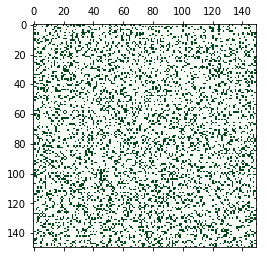

In [6]:
#image#
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

plt.matshow(forest.trees, cmap=cm.Greens)

plt.show()

In [7]:
print(plt.show)

<function show at 0x00000207C9544268>


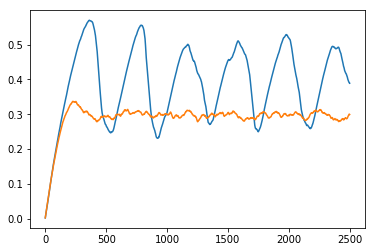

In [8]:
#tending
forest = Forest()
forest2 = Forest(p_lightning=5e-4)

tree_fractions = []

for i in range(2500):
    forest.advance_one_step()
    forest2.advance_one_step()
    tree_fractions.append((forest.tree_fraction, forest2.tree_fraction))

plt.plot(tree_fractions)

plt.show()